## 서포트 벡터 머신 (SVM)

In [1]:
# data load 등을 위한 chdir
import os
os.chdir("../introduction_to_ml_with_python-master/")

# graph 출력을 위한 기본설정
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고 문구 출력 방지를 위한 설정
import warnings
warnings.filterwarnings(action='ignore')

# basic packages import
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt

### 라지 마진 분류

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

# 시각화를 위해 2개의 특성만 저장
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]
y = iris.target

# 이진분류를 위해 2개의 label만 저장
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

# '''
# sklearn은 서포트 벡터 머신으로 SVC와 LinearSVC 두가지를 제공함.
# SVC 클래스는 C언어의 libsvm라이브러리를 wrapping해 사용함.
# LinearSVC 클래스는 C언어의 liblinear라이브러리를 wrapping해 사용함.
# libsvm은 OvO방식으로 다중분류를 수행함. 비선형과 선형모델 모두 제공함.
# liblinear는 OvR방식으로 다중분류를 수행함. 선형모델만 제공함.
# SVC모델의 kernel을 linear로 지정하면, 힌지함수를 손실함수를 사용함.
# LinearSVC모델은 기본적으로 힌지함수를 제곱하여 손실함수로 사용함.
# 모델을 생성할 때 C매개변수를 통해 규제를 설정함.
# C값은 커질수록 규제가 작아짐. C를 무한으로 놓아서 규제가 없는 모델을 만듦.
# '''

SVC(C=inf, kernel='linear')

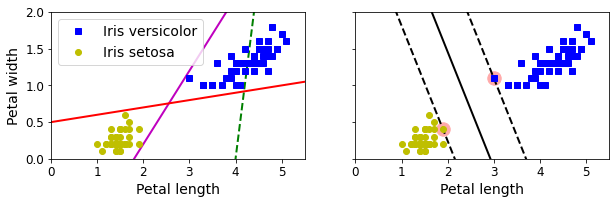

In [3]:
# 좋은 모델과 그렇지 않은 모델을 시각화
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # 두 클래스 경계 사이가 가장 넓은 폭을 찾는 알고리즘
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

# '''
# 결정 경계를 만들 때 가장 도움이 되는 샘플을 서포트 벡터라고 함.
# 서포트 벡터로부터 그려지는 결정경계와 이 결정 경계가 샘플과의 거리가 최대가 되도록 찾음.
# 좌측의 그래프에 있는 결정 경계들은 좋지 않은 모델의 예시임.
# 우측의 그래프처럼 서포트 벡터로부터 가장 거리가 먼 결정경계를 만드는 것이 좋음.
# 결정경계와 서포트 벡터와의 거리를 마진이라고 함.
# 즉, 마진을 최대화 하는 결정경계를 찾는 것이 SVM 모델 알고리즘임.
# 거리를 기반으로 하기 때문에, 특성의 스케일에 민감함.
# '''

### 특성의 스케일에 민감함

(-2.0, 2.0, -2.0, 2.0)

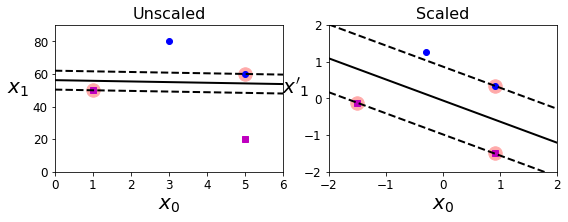

In [4]:
# 샘플용 데이터 생성
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# 스케일링을 수행하지 않고 모델 학습
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# 모델 시각화
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# 스케일링 수행 후 모델 학습
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# 모델 시각화
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

# '''
# 좌측 그래프를 보면, 스케일링 되지 않은 X1 특성에 크게 영향받는 것을 볼 수 있음.
# X1축에 수직으로 결정경계가 만들어지고, X2 특성은 무시되는 것을 볼 수 있음.
# 우측 그래프의 결정경계를 보면 마진이 훨씬 커지는 것을 볼 수 있음.
# '''

### 이상치에 민감함

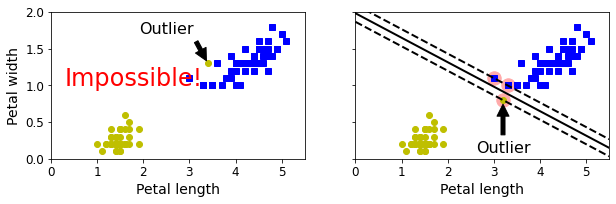

In [5]:
# 이상치 생성하여 저장
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

# '''
# 좌측 그래프를 보면, 이상치 1개로 인해 결정경계를 그리더라도 제대로 분류 할 수 없음.
# 우측 그래프를 보면, 이상치 1개로 인해 마진이 매우 좁아지는 것을 볼 수 있음.
# '''

### 라지 마진 vs 마진 오류

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 특성은 2개만 사용하고 virsinica에 대한 이진분류로 저장
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 2).astype(np.float64)

# 파이프라인으로 구축하여 스케일링 수행 후 학습
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linnear_svc', LinearSVC(C=1, loss='hinge', random_state=42)),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linnear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [7]:
# 임의의 샘플에 대한 예측
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
# 규제가 다른 모델 생성
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf2 = LinearSVC(C=10, loss='hinge', random_state=42)

# 다른 모델을 사용하는 Pipeline구축
scaled_svm_clf1 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf1)
])
scaled_svm_clf2 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf2)
])

# 두 모델 학습
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# '''
# 추후 서포트 벡터를 찾기 위해 loss는 hinge로 설정함.
# '''

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge', random_state=42))])

In [9]:
# 스케일되지 않은 파라미터로 변경
# z = (X - mean) / std의 반대로 설정
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# '''
# 스케일링한 데이터를 원본으로 복구하여, 모델의 파라미터를 조정함.
# LinearSVC가 사용하는 liblinear 라이브러리는 서포트 벡터를 저장하지 않음.
# 서포트벡터를 찾기 위해 힌지손실을 구현한 코드가 포함되어 있음.
# 힌지손실은 max(0, 1-t*y)임. t는 1 or -1이며, y는 결정함수임.
# t의 값을 맞춰주기 위해 0과 1을 -1과 1로 변경함.
# 힌지손실은 y의 절대값이 1이상인 경우 손실이 0이 됨.
# log loss나 힌지손실함수는 모두 이진분류에 대해서 0과 1로 되어있는 타겟을 -1과 1로 변경함.
# sklearn 내부적으로 일어나는 일로, 활용에 있어서 반드시 이해해야 하지는 않음.
# libsvm을 사용하는 SVC는 서포트 벡터를 저장함.
# '''

(4.0, 5.9, 0.8, 2.8)

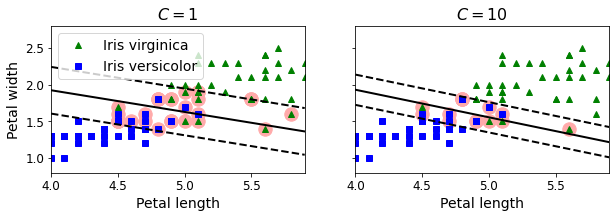

In [10]:
# 규제에 따른 결정경계 확인
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# '''
# C값이 커짐에 따라서 규제가 작아짐.
# 규제가 작을수록 마진오류는 적어지나, 마진의 범위가 줄어듦.
# 마진의 범위가 줄어든다는 의미는 모델이 복잡해진다는 의미임.
# 즉, C값이 커지면 모델이 복잡해짐.
# '''

### 비선형 분류

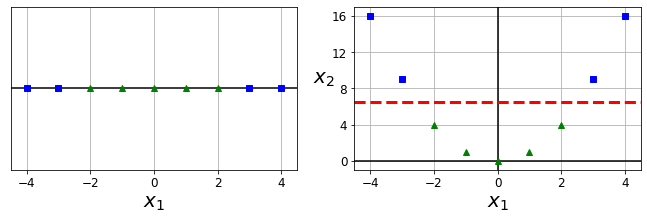

In [11]:
# 샘플용 1차원과 2차원 데이터셋을 생성
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

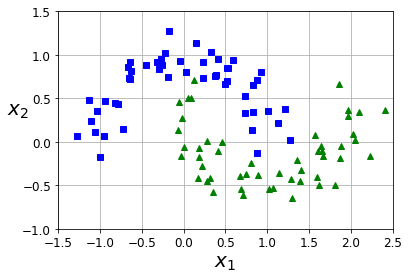

In [12]:
# make_moons 샘플 확인
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 시각화용 함수 정의
def plot_dataset(X, y, axes) :
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)
    pass # plot_dataset

# 데이터 샘플 시각화
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# '''
# 선형적으로 하나의 직선으로 분류할 수 없는 데이터임.
# '''

In [13]:
# 특성을 추가하여 데이터를 학습하는 Pipeline 구성
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

# '''
# sklearn이 제공하는 SVM의 구분은 아래와 같음.
# SVC는 C언어의 libsvm라이브러리로, 커널함수를 사용함.
# LinearSVC는 C언어의 liblinear라이브러리로, 선형함수를 사용함.
# SVC가 먼저 개발되었는데, 성능이 좋은 면이 많음.
# LinearSVC가 성능이 좋지 않다고 생각할 수 있으나, 지식에 따라 훨씬 활용도가 높음.
# 텍스트 분석에도 고차원을 사용하지 않고 LinearSVC로 linear하게 해결할 수 있음.
# 희소한 데이터셋이나 특성이 많은 데이터에 대해서는 LinearSVC가 훨씬 빠르게 해결함.
# liblinear는 절편도 규제에 포함하기 때문에, StandardScale을 수행함.
# '''

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

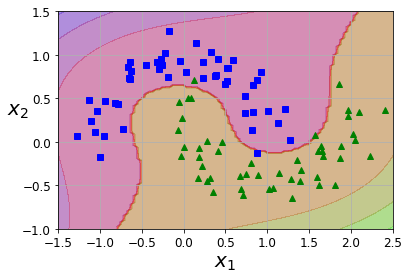

In [14]:
# LinearSVC의 예측과 결정경계 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.3)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [15]:
# SVC 모델 사용
from sklearn.svm import SVC

# 최대 차수가 3인 모델 생성 및 학습
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

# 최대 차수가 10인 모델 생성 및 학습
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

# '''
# LinearSVC는 비선형적인 분류를 위해 Polynomial을 수행해야하나, 차원이 많을 경우에 유리함.
# 반대로 SVC는 kernel에만 Polynomial을 입력하면 되나, 차원이 많을 경우 느려짐.
# kernel 트릭은 여러가지가 있음.
# 'poly'는 실제로 polynomial한 데이터를 만들지는 않으나, 유사한 효과를 냄.
# coef0는 상수항이고, gamma는 스케일에 의해 지정됨.
# 내부적으로는, (gamma * <x, x'> + coef0)^degree와 같이 계산함.
# 상수항을 크게하면, 최고차항을 어느정도 규제할 수 있기에 100으로 설정함.
# '''

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

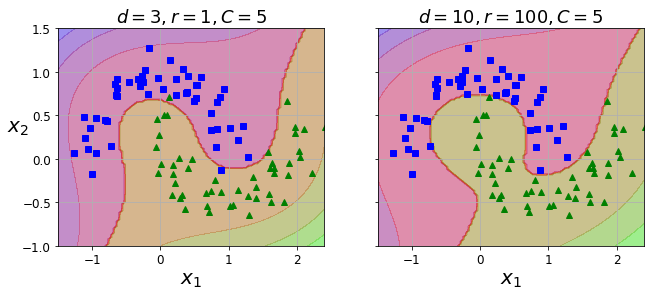

In [16]:
# 두 모델의 예측 및 결정경계 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

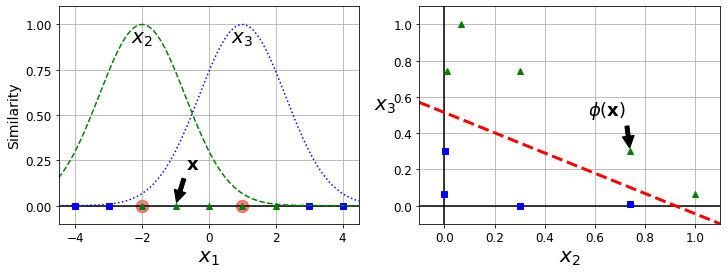

In [17]:
# 가우시안 함수(지수함수)에 대한 시각화
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

# '''
# 방사 기저 함수에 지정한 데이터 포인트와 가까울 수록 큰 영향을 받고, 멀 수록 영향을 덜 받음.
# 가우시안 커널에 영향도를 기준으로 축을 설정하면 데이터를 선형적으로 분류할 수 있음.
# '''

In [18]:
# 그래프에 표시된 x에 대한 영향도 확인
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))
    pass # landmark and x

# '''
# x에 대해서 각 landmark x2와 x3의 영향도를 확인할 수 있음.
# -2에 대한 가우시안 함수 x2는 0.7의 영향도가 있음.
# 1에 대한 가우시안 함수 x3는 0.3의 영향도가 있음.
# '''

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [19]:
# rbf커널(가우시안 함수 기반)을 사용한 Pipeline 구축
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

# '''
# rbf는 실제로 많은 다항식을 추가하는 것과 유사한 효과를 냄.
# 엄청나게 큰 고차원으로 데이터를 전환하여 계산함.
# SVC 모델은 모든 데이터 포인트를 랜드마크로 활용하여, 모든 데이터와의 거리(영향도)를 확인함.
# SVC 모델은 실제로 데이터를 고차원으로 매핑시키지는 않고 유사한 효과만 거둠.
# 그렇기 떄문에 고차원으로부터 얻은 coef_값이 없음.
# '''

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

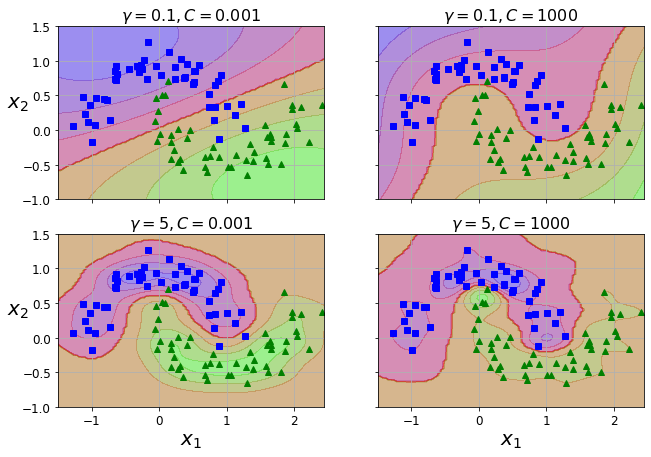

In [20]:
# gamma값과 C값(규제값)의 변화에 따른 시각화
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

# 하이퍼파라미터를 조정하며 svm_clf모델 생성
svm_clfs = []
for gamma, C in hyperparams :
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    pass # svm_clfs loop

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7),
                         sharex=True, sharey=True)

# 모델 시각화
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# '''
# gamma가 커지면, 가우시안 출력이 작아짐. 샘플간의 영향이 줄어들어 복잡한 결정경계가 됨.
# C가 커지면, 규제가 작아짐. 이에 따라 복잡한 결정경계가 됨.
# 즉, gamma와 C값이 커질수록 복잡한 모델이 만들어짐.
# '''

### 회귀

In [21]:
# 샘플용 데이터 생성
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [22]:
# LinearSVR 사용
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

# '''
# sklearn은 분류와 마찬가지로 회귀에도 2개의 모델(SVR, LinearSVR)을 제공함.
# loss는 힌지손실을 사용하나, 분류와 살짝 다름.
# SVM 회귀모델의 목적(손실)함수는 max(0, |y-yhat|-epsion)를 최소화 하는 것임.
# 결국, SVM 회귀모델은 y-yhat이 epsilon보다 작게 하고자 하는 것임.
# 위 식으로, epsilon은 도로의 폭을 결정하는 매개변수가 됨.
# '''

LinearSVR(epsilon=1.5, random_state=42)

In [23]:
# epsilon값이 다른 모델 생성 및 학습
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# LinearSVR 모델이 support vector값을 저장하지 않기에 찾는 함수 정의
def find_support_vectors(svm_reg, X, y) :
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# 모델에 새로운 속성을 추가해 해당 값 저장
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

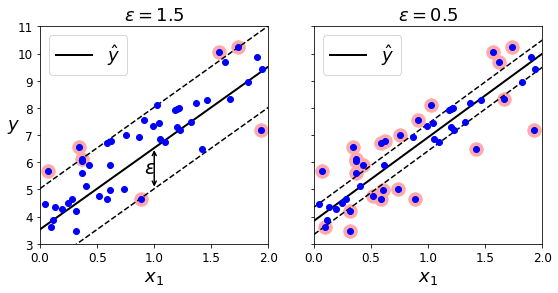

In [24]:
# epsilon이 다른 모델 시각화
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [25]:
# 샘플용 데이터 생성
np.random.seed(42)
m = 100

# -1~1인 100개의 X 데이터 셋 생성
X = 2 * np.random.rand(m, 1) - 1

# 2차식으로 비선형적인 y 데이터 셋 생성
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [26]:
# poly kernel을 사용한 모델 생성
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [27]:
# C값이 다른 모델 생성
svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1, gamma='scale')
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

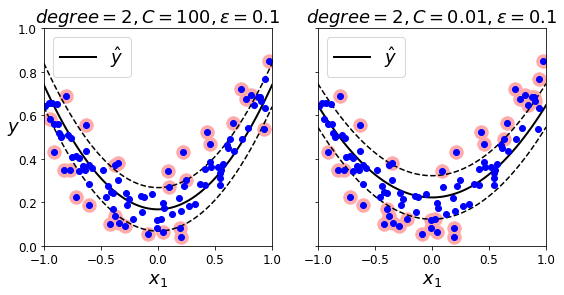

In [28]:
# C값이 다른 모델 시각화
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

# '''
# C값이 클수록, 규제가 작아져, 복잡한 모델이 됨.
# 같은 2차원형태라도, 더 급한 기울기를 보임.
# esilon에 따라 도로폭이 결정됨.
# 비선형적인 모델은 회귀선으로부터 y축에 평행하게 이동하는 도로가 생기므로, 도로폭이 일정하지 않음.
# '''

### SVM이론

선형 SVM 분류기의 예측

$
\hat{y} = \begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b \lt 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}
$

In [29]:
# 샘플 데이터셋 저장
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 2).astype(np.float64)

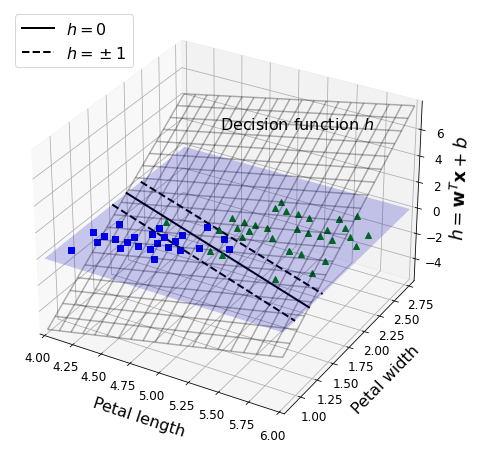

In [30]:
# 결정함수 그래프 시각화
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    # 결정함수의 공식 y=x1s*w[0] + x2s*w[1] + b
    # 결정경계는 y를 0으로 하는 식이 됨.
    # 마진은 결정경계로부터 1만큼 떨어진 좌표로, y=1or-1이 되는 식이 됨.
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 8))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])
plt.show()

# '''
# 힌지 손실함수 max(0, 1-t*y)에 따라 y의 절대값이 1이 넘어야 손실이 0이 됨.
# 모든 데이터가 이 손실이 0이 되는 것을 목표로 y, 결정경계를 찾음.
# Decision function 축이 누울수록 마진은 커짐.
# 가중치가 낮을수록 Decision function이 누울 수 있음.
# 그렇기 때문에 SVC는 최대한 낮은 가중치 벡터를 찾고자 함.
# '''

### 낮은 가중치 벡터 = 라지 마진

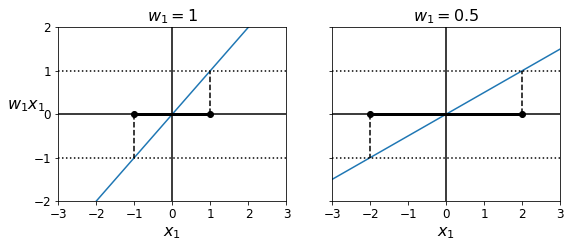

In [31]:
# 가중치 벡터에 따른 Decision function의 기울기와 마진 시각화
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

# '''
# 가중치 벡터 W는 L2 norm임.
# 가중치 W에 따라 h차원에 대한 Decision function이 달라짐.
# 가중치 W가 낮으면 h차원에 대해 Decision function의 기울기가 높아짐.
# 이는, 특성 평면에 대해서 Decision function의 기울기가 낮아지는 것임.
# 특성 평면과의 기울기가 낮을 수록, 마진이 커짐.
# 즉, L2 norm을 줄이는 것이 목적이 됨.
# '''

하드 마진 선형 SVM 분류기 목적 함수

$ \begin{split} &\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\ &\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m \end{split} $

소프트 마진 선형 SVM 분류기 목적 함수

$ \begin{split} &\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\ &\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m \end{split} $

2차 다항식 매핑

$
\phi\left(\mathbf{x}\right) = \phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = \begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}
$

2차 다항식 매핑을 위한 커널 트릭

$
\begin{split}
\phi(\mathbf{a})^T \phi(\mathbf{b}) & \quad = \begin{pmatrix}
  {a_1}^2 \\
  \sqrt{2} \, a_1 a_2 \\
  {a_2}^2
  \end{pmatrix}^T \begin{pmatrix}
  {b_1}^2 \\
  \sqrt{2} \, b_1 b_2 \\
  {b_2}^2
\end{pmatrix} = {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
 & \quad = \left( a_1 b_1 + a_2 b_2 \right)^2 = \left( \begin{pmatrix}
  a_1 \\
  a_2
\end{pmatrix}^T \begin{pmatrix}
    b_1 \\
    b_2
  \end{pmatrix} \right)^2 = (\mathbf{a}^T \mathbf{b})^2
\end{split}
$

일반적인 커널

$
\begin{split}
\text{선형:} & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{다항식:} & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{가우시안 RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = \exp({\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}) \\
\text{시그모이드:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}
$

선형 SVM 분류기의 비용 함수

$ J(\mathbf{w}, b) = \dfrac{1}{2} \mathbf{w}^T \mathbf{w} \,+\, C {\displaystyle \sum\limits_{i=1}^{m}max\left(0, t^{(i)} - (\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)} $

### 힌지 손실 함수

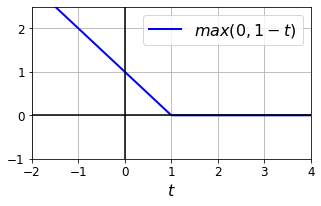

In [32]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)

plt.show()

# '''
# t 값에 따라서, 1이하인 경우에는 손실이 생기고, t가 1보다 클 때 부터 손실이 0이 됨.
# '''

### 추가 내용

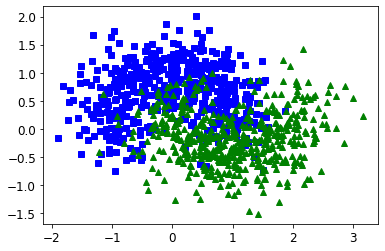

In [33]:
# 샘플 데이터 셋 생성 및 시각화
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

[LibSVM]0 0.1 0.34290170669555664
[LibSVM]1 0.01 0.3208014965057373
[LibSVM]2 0.001 0.4387941360473633
[LibSVM]3 0.0001 1.0280332565307617
[LibSVM]4 1e-05 1.2587559223175049
[LibSVM]5 1.0000000000000002e-06 1.0448310375213623
[LibSVM]6 1.0000000000000002e-07 9.053177833557129
[LibSVM]7 1.0000000000000002e-08 1.137561321258545
[LibSVM]8 1.0000000000000003e-09 1.1048357486724854
[LibSVM]9 1.0000000000000003e-10 1.1208460330963135


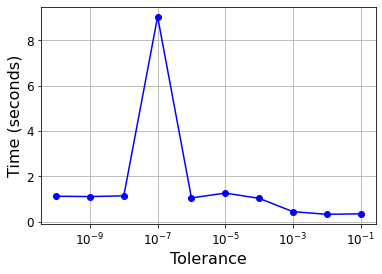

In [34]:
# tol 매개변수와 훈련시간의 관계 시각화
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

# '''
# tol값이 너무 낮으면 불안정한 것을 볼 수 있음.
# '''

### 배치 경사 하강법을 사용한 선형 SVM 분류기 구현

In [35]:
# 훈련 세트 생성
X = iris["data"][:, (2, 3)] # # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

In [36]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    # 학습률을 조정하는 메서드
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        # 힌지 손실함수에 따라 이 식이 도출됨.
        # 1 - t*y = 1 - t*(w*x + b) = 1 - tx*w - t*b
        # x와 t를 먼저 곱해서 사용한 다음 w와 tb를 계산 할 예정
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            # 마진 안의 서포트 벡터를 찾음.
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            # 손실 값 계산
            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            # w와 b에 대한 편미분을 수행하고, 기울기가 낮아지는 방향을 찾음.
            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)
                
            # 배치경사 하강법으로 찾아나감.
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

(0.0, 60000.0, 0.0, 100.0)

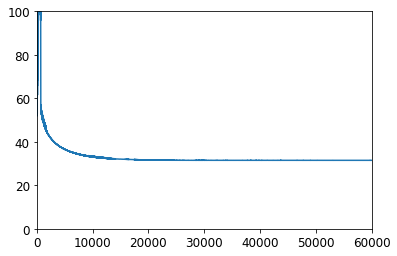

In [37]:
# 손실값과 epoch의 관계 시각화
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

(4.0, 6.0, 0.8, 2.8)

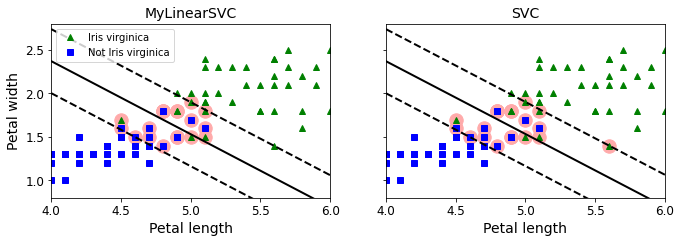

In [38]:
# sklearn이 제공하는 SVC 모델 생성
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())

# 구현한 모델과 SVC 모델 비교
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

[-12.52988101   1.94162342   1.84544824]


(4.0, 6.0, 0.8, 2.8)

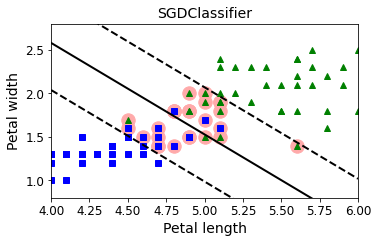

In [39]:
# SGDClassifier로 유사한 결과 시각화
from sklearn.linear_model import SGDClassifier

# SGDClassifier도 loss를 힌지로 둘 수 있으나 배치경사하강법은 아닌, 확률적 경사하강법을 사용함.
sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y.ravel())

m = len(X)
t = y * 2 - 1  # t==0이면 -1, t==1이면 +1
X_b = np.c_[np.ones((m, 1)), X]  # 편향 x0=1을 추가합니다
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])